<div align='center'>
    <h1>TUGAS PRAKTIKUM DFS</h1>

</div>

### 1. DFS

Buatlah graf berbobot (weighted graf) dari 2 gambar graf berikut ini menggunakan library NetworkX. Kemudian lakukan penelurusan Depth First Search menggunakan library NetworkX! Kemudian periksalah hasilnya secara manual! Untuk graf kota-kota besar di Eropa, kota asal (source)-nya adalah Arad. Untuk graf kota-kota Pulau Jawa, kota asal (source)-nya adalah Bandung. Periksa apakah informasi weight digunakan atau tidak pada algoritma Breadth First Search ini!

**A.** Graf Kota Besar Di Eropa.

In [3]:
import networkx as nx 
import matplotlib.pyplot as plt

In [4]:
pos = {
    'Oradea': (2, 7),
    'Zerind': (1, 6),
    'Arad': (0, 5),
    'Timisoara': (0, 3),
    'Lugoj': (1, 2),
    'Mehadia': (1, 1),
    'Drobeta': (0, 0),
    'Craiova': (2, 0),
    'Rimnicu Vilcea': (3, 3),
    'Sibiu': (3, 5),
    'Fagaras': (5, 5),
    'Pitesti': (4, 2),
    'Bucharest': (6, 1),
    'Giurgiu': (5, 0),
    'Urziceni': (7, 1),
    'Hirsova': (9, 1),
    'Eforie': (9, 0),
    'Vaslui': (8, 3),
    'Iasi': (9, 5),
    'Neamt': (7, 7)
}

In [5]:
def show_graph(G, pos=None, title='', path=None):
    plt.figure(figsize=(12, 10))
    
    if pos is None:
        pos = nx.spring_layout(G, k=0.5)
    
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color='lightgray',
        node_size=700,
        font_color="black",
        font_weight="bold",
        width=1.5,
        font_size=11,
        edgecolors='black'
    )
    
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='red', node_size=700)
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.5)
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(
        G,
        pos,
        edge_labels=edge_labels,
        font_color='blue',
        font_weight="bold",
        font_size=10
    )
    
    plt.margins(0.15)
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

In [6]:
europe = nx.Graph()

In [7]:
cities = ['Oradea', 'Zerind', 'Arad', 'Timisoara', 'Lugoj', 'Mehadia', 'Drobeta', 
          'Craiova', 'Rimnicu Vilcea', 'Sibiu', 'Fagaras', 'Pitesti', 'Bucharest', 
          'Giurgiu', 'Urziceni', 'Hirsova', 'Eforie', 'Vaslui', 'Iasi', 'Neamt']

europe.add_nodes_from(cities)

/tmp/ipykernel_16406/208270980.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


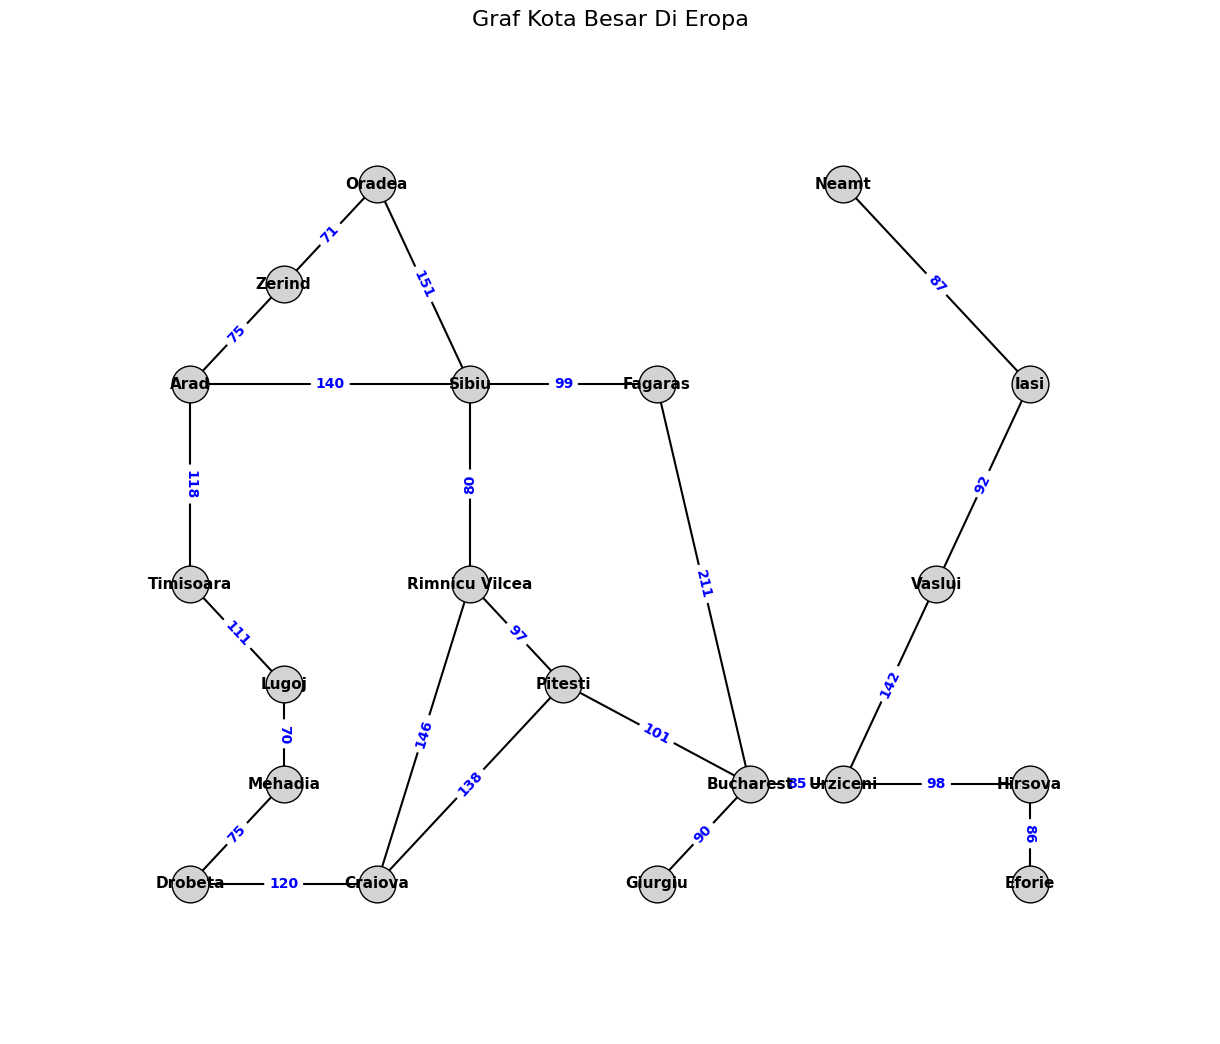

In [8]:
edges = [
    ('Oradea', 'Zerind', 71),
    ('Oradea', 'Sibiu', 151),
    ('Zerind', 'Arad', 75),
    ('Arad', 'Sibiu', 140),
    ('Arad', 'Timisoara', 118),
    ('Timisoara', 'Lugoj', 111),
    ('Lugoj', 'Mehadia', 70),
    ('Mehadia', 'Drobeta', 75),
    ('Drobeta', 'Craiova', 120),
    ('Craiova', 'Rimnicu Vilcea', 146),
    ('Craiova', 'Pitesti', 138),
    ('Rimnicu Vilcea', 'Sibiu', 80),
    ('Rimnicu Vilcea', 'Pitesti', 97),
    ('Sibiu', 'Fagaras', 99),
    ('Fagaras', 'Bucharest', 211),
    ('Pitesti', 'Bucharest', 101),
    ('Bucharest', 'Giurgiu', 90),
    ('Bucharest', 'Urziceni', 85),
    ('Urziceni', 'Hirsova', 98),
    ('Hirsova', 'Eforie', 86),
    ('Urziceni', 'Vaslui', 142),
    ('Vaslui', 'Iasi', 92),
    ('Iasi', 'Neamt', 87)
]

for source, target, weight in edges:
    europe.add_edge(source, target, weight=weight)

show_graph(europe, pos=pos, title="Graf Kota Besar Di Eropa")

/tmp/ipykernel_16406/208270980.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


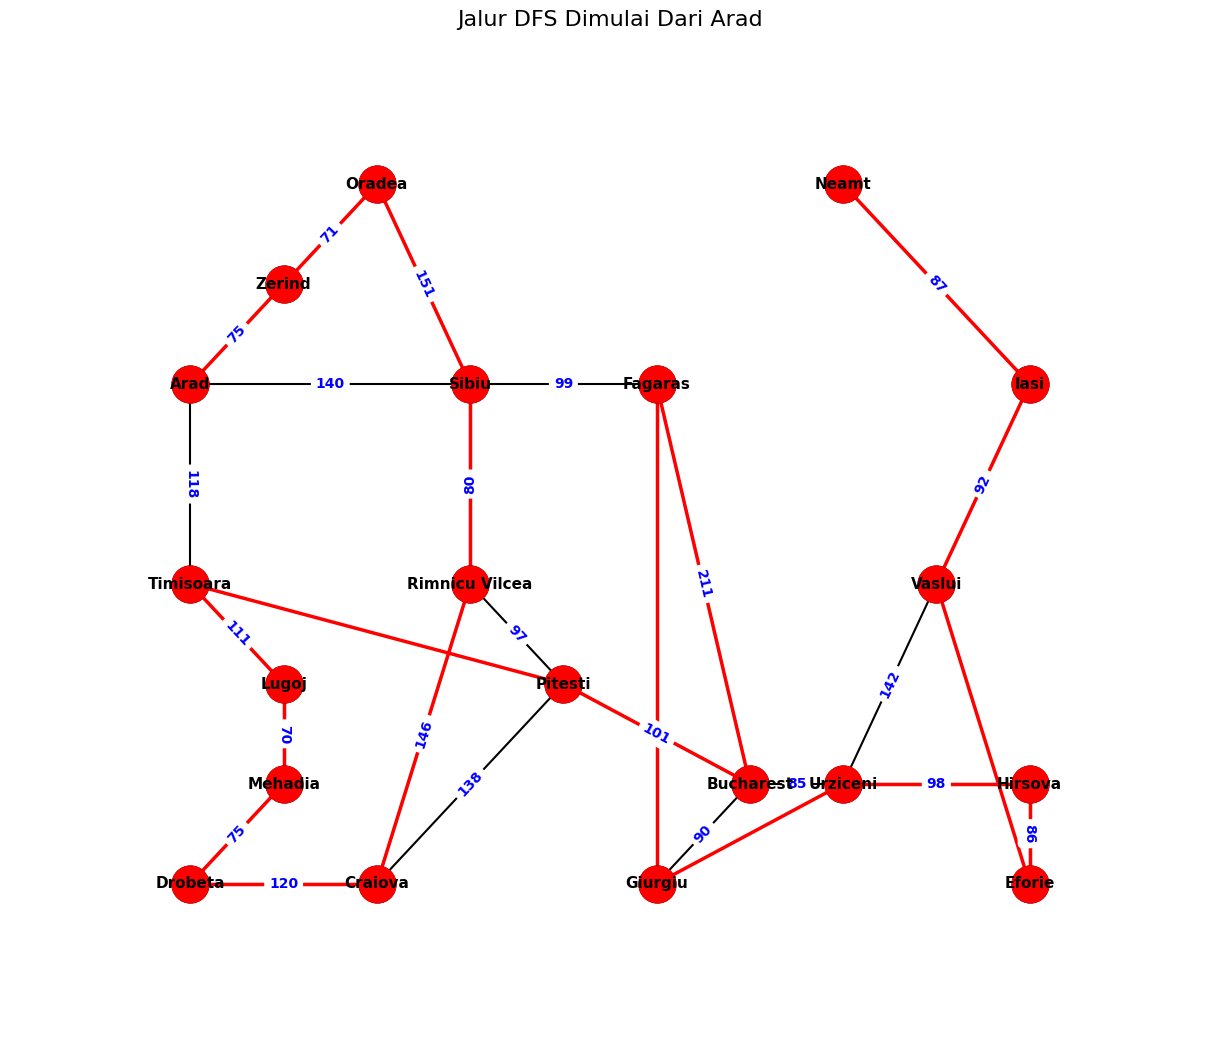

In [9]:
dfs_edges = list(nx.dfs_edges(europe, source='Arad'))
dfs_path = ['Arad']
for edge in dfs_edges:
    dfs_path.append(edge[1])

show_graph(europe, pos=pos, title="Jalur DFS Dimulai Dari Arad", path=dfs_path)

In [10]:
print("Jalur DFS dari Arad:")
print(" -> ".join(dfs_path))

Jalur DFS dari Arad:
Arad -> Zerind -> Oradea -> Sibiu -> Rimnicu Vilcea -> Craiova -> Drobeta -> Mehadia -> Lugoj -> Timisoara -> Pitesti -> Bucharest -> Fagaras -> Giurgiu -> Urziceni -> Hirsova -> Eforie -> Vaslui -> Iasi -> Neamt


**B.** Graf Kota Besar Di Indonesia(Jawa).

In [11]:
import networkx as nx 
import matplotlib.pyplot as plt

In [12]:
pos = {
    'Jakarta': (0, 5),
    'Bandung': (1, 3),
    'Cirebon': (2, 5),
    'Yogyakarta': (4, 3),
    'Semarang': (5, 5),
    'Surakarta': (6, 4),
    'Surabaya': (8, 5),
    'Malang': (8, 3)
}

In [13]:
def show_graph(G, pos=None, title='', path=None):
    # Set figure size
    plt.figure(figsize=(12, 8))
    
    if pos is None:
        pos = nx.spring_layout(G, k=0.5)
 
    nx.draw(
        G,
        pos,
        with_labels=True,
        node_color='lightgray',
        node_size=700,
        font_color="black",
        font_weight="bold",
        width=1.5,
        font_size=11,
        edgecolors='black'
    )
    
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='red', node_size=700)
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.5)
    
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(
        G,
        pos,
        edge_labels=edge_labels,
        font_color='blue',
        font_weight="bold",
        font_size=10
    )
    
    plt.margins(0.15)
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

In [14]:
kota_jawa = nx.Graph()

In [15]:
kota = ['Jakarta', 'Bandung', 'Cirebon', 'Yogyakarta', 'Semarang', 'Surakarta', 'Surabaya', 'Malang']
kota_jawa.add_nodes_from(kota)

/tmp/ipykernel_16406/2331189319.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


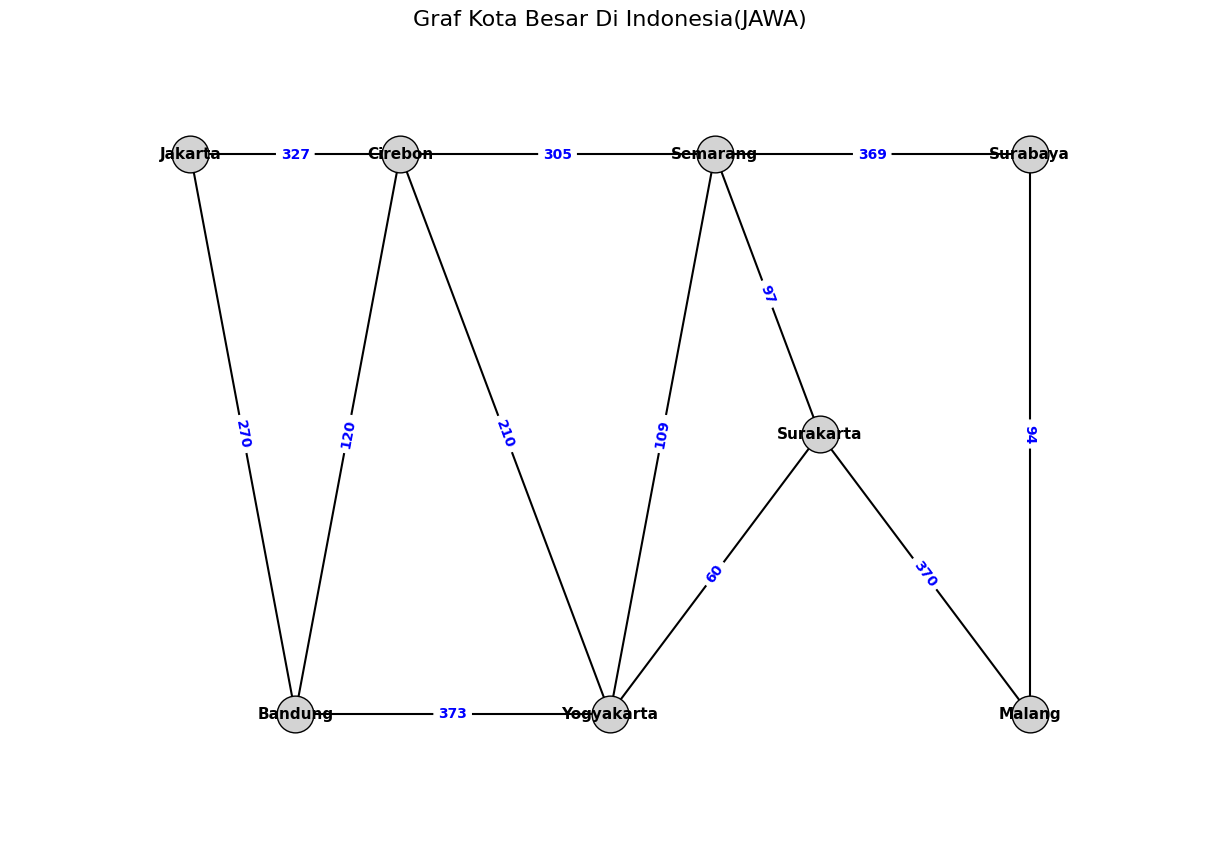

In [16]:
edges = [
    ('Jakarta', 'Cirebon', 327),
    ('Jakarta', 'Bandung', 270),
    ('Bandung', 'Cirebon', 120),
    ('Bandung', 'Yogyakarta', 373),
    ('Cirebon', 'Semarang', 305),
    ('Cirebon', 'Yogyakarta', 210),
    ('Yogyakarta', 'Semarang', 109),
    ('Yogyakarta', 'Surakarta', 60),
    ('Semarang', 'Surakarta', 97),
    ('Semarang', 'Surabaya', 369),
    ('Surakarta', 'Malang', 370),
    ('Surabaya', 'Malang', 94)
]

for source, target, weight in edges:
    kota_jawa.add_edge(source, target, weight=weight)

show_graph(kota_jawa, pos=pos, title="Graf Kota Besar Di Indonesia(JAWA)")

/tmp/ipykernel_16406/2331189319.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


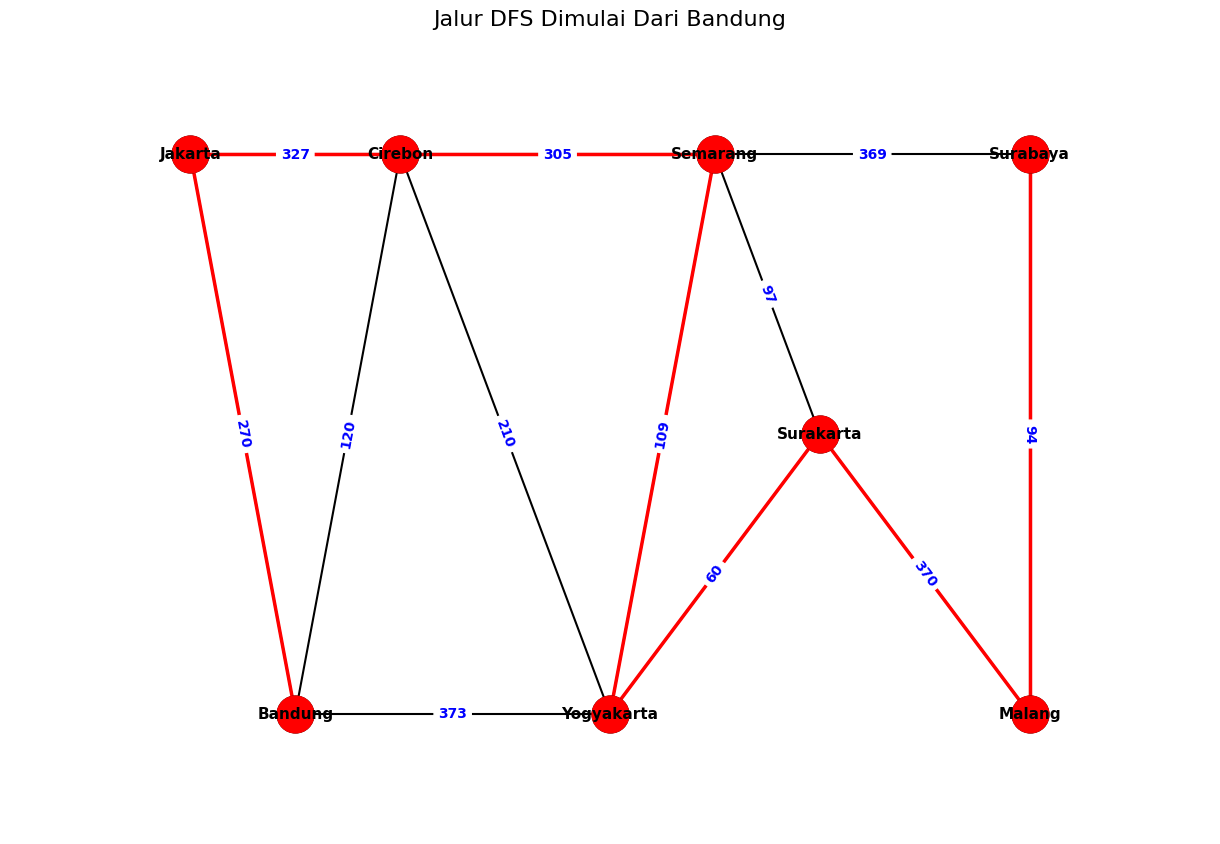

In [17]:
dfs_edges = list(nx.dfs_edges(kota_jawa, source='Bandung'))
dfs_path = ['Bandung']
for edge in dfs_edges:
    dfs_path.append(edge[1])

# Display the graph with DFS path highlighted
show_graph(kota_jawa, pos=pos, title="Jalur DFS Dimulai Dari Bandung", path=dfs_path)

In [18]:
print("Jalur DFS Dari Bandung")
print(" -> ".join(dfs_path))

Jalur DFS Dari Bandung
Bandung -> Jakarta -> Cirebon -> Semarang -> Yogyakarta -> Surakarta -> Malang -> Surabaya
